# Mount to drive (to get dataset)

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Read Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RowId        27124 non-null  int64  
 1   ImageId      27124 non-null  int64  
 2   FeatureName  27124 non-null  object 
 3   Location     0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   RowId     27124 non-null  int64
 1   Location  27124 non-null  int64
dtypes: int64(2)
memory usage: 423.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1

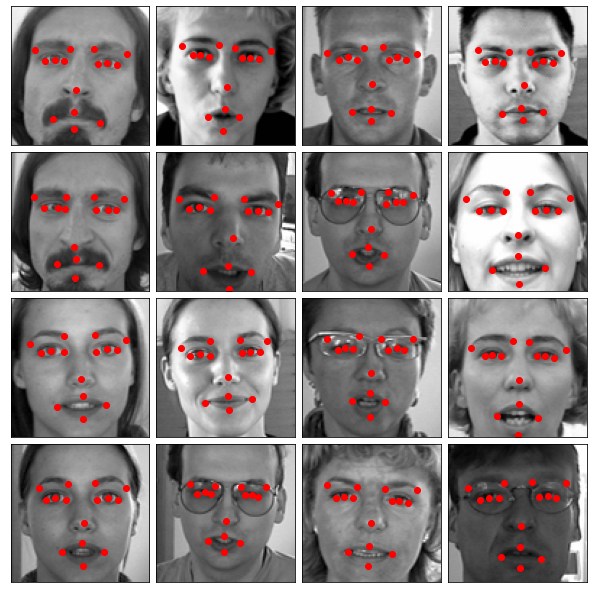

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

IdLookupTable = pd.read_csv('IdLookupTable.csv')
IdLookupTable.info()
IdLookupTable.head()

SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.info()

SampleSubmission.head()

test = pd.read_csv('test.csv')
test.info()
test.head()

training = pd.read_csv('training.csv')
training.info()

training.head(2)


training = training.dropna()
#training.fillna(method = 'ffill',inplace = True)

training.shape, type(training)

training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

def get_image_and_dots(df, index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l
	
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(training, i)

plt.show()

X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'], axis=1)

y2 = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)


################################
#   Build your model           #
################################

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
print('x train:', X_train.shape)
print('y train :', y_train.shape)
print('-------------------------')
print('x test:' , X_test.shape)
print('y test:', y_test.shape)

x train: (1498, 96, 96, 1)
y train : (1498, 30)
-------------------------
x test: (642, 96, 96, 1)
y test: (642, 30)


In [10]:
y_train

array([[65.55279785, 38.91971449, 29.90048057, ..., 77.71878096,
        42.80610654, 79.4357758 ],
       [65.73737143, 33.34834286, 26.05268571, ..., 70.8456    ,
        44.4888    , 80.84468571],
       [67.9316019 , 36.93934408, 28.68853081, ..., 74.55605687,
        43.32830332, 87.97558294],
       ...,
       [67.24939806, 35.8583301 , 29.76093204, ..., 66.26516505,
        47.25530097, 84.17615534],
       [69.7650219 , 38.73740146, 28.71170803, ..., 82.63427737,
        47.55013139, 90.80934307],
       [69.62626415, 32.21859623, 28.74656604, ..., 67.43184906,
        51.00769811, 82.4069434 ]])

In [11]:
y_train[0]

array([65.55279785, 38.91971449, 29.90048057, 36.78294963, 58.39067862,
       39.1571328 , 73.28867801, 39.01863879, 37.63636073, 37.09950739,
       23.68645181, 36.44502423, 56.90865588, 32.1947924 , 78.58353272,
       31.69936664, 41.62477129, 34.79577762, 21.10423645, 28.91111049,
       47.24560169, 58.07097617, 53.58264871, 79.08398475, 33.77171097,
       76.64623937, 43.0352098 , 77.71878096, 42.80610654, 79.4357758 ])

In [12]:
X_train[0]

array([[[ 89],
        [141],
        [139],
        ...,
        [123],
        [168],
        [174]],

       [[112],
        [139],
        [154],
        ...,
        [124],
        [160],
        [166]],

       [[112],
        [127],
        [160],
        ...,
        [138],
        [140],
        [160]],

       ...,

       [[136],
        [115],
        [114],
        ...,
        [131],
        [101],
        [ 92]],

       [[148],
        [113],
        [118],
        ...,
        [113],
        [ 72],
        [107]],

       [[148],
        [145],
        [123],
        ...,
        [ 80],
        [ 86],
        [104]]], dtype=uint8)

# Build Model

In [29]:
from keras import Model
from keras.layers import Conv2D, Dense, LSTM, Input , GlobalMaxPool2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam, Adamax, SGD, rmsprop
#from keras.metrics import Accuracy
from keras.losses import MeanSquaredError
import tensorflow as tf
from keras import backend as K

In [26]:
# My 4th model
input_layer = Input(shape= X_train[0].shape)

layer = Conv2D(128, (3,3), padding='same')(input_layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(64, (3,3), padding='same')(layer)
layer = Dropout(0.2)(layer)


layer = Conv2D(32, (3,3), padding='same')(layer)
layer = Dropout(0.2)(layer)

layer = GlobalMaxPool2D()(layer)
out = Dense(30, activation = 'relu')(layer)

model_4 = Model(input_layer, out)
model_4.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 128)       1280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 96, 96, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        73792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 96, 96, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        18464     
_________________________________________________________________
dropout_6 (Dropout)          (None, 96, 96, 32)        0   

In [30]:
epochs = 100
batch_size = 10
lr = 0.1

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model_4.compile( optimizer='Adam', loss= RMSE, metrics= ['accuracy'])
history = model_4.fit( X_train, y_train, batch_size=batch_size, epochs= epochs, verbose=1, validation_split=0.1, shuffle=True)

Train on 1348 samples, validate on 150 samples
Epoch 1/100
1348/1348 [==============================] - 7s 5ms/step - loss: 30.6141 - accuracy: 0.2945 - val_loss: 34.1721 - val_accuracy: 0.3267
Epoch 2/100
1348/1348 [==============================] - 7s 5ms/step - loss: 28.5368 - accuracy: 0.4206 - val_loss: 30.5042 - val_accuracy: 0.0667
Epoch 3/100
1348/1348 [==============================] - 7s 5ms/step - loss: 28.3327 - accuracy: 0.4577 - val_loss: 31.3919 - val_accuracy: 0.2333
Epoch 4/100
1348/1348 [==============================] - 7s 5ms/step - loss: 28.1739 - accuracy: 0.4829 - val_loss: 31.4775 - val_accuracy: 0.1400
Epoch 5/100
1348/1348 [==============================] - 7s 5ms/step - loss: 28.1578 - accuracy: 0.5245 - val_loss: 32.4155 - val_accuracy: 0.2400
Epoch 6/100
1348/1348 [==============================] - 7s 5ms/step - loss: 27.4452 - accuracy: 0.5015 - val_loss: 30.8794 - val_accuracy: 0.3533
Epoch 7/100
1348/1348 [==============================] - 7s 5ms/step - 

In [32]:
model_4.evaluate(x=X_test, y= y_test, verbose=1 )

642/642 [==============================] - 1s 1ms/step


[21.150854669256002, 0.1355140209197998]

In [34]:
model_4.save('my_fourth_model')

In [35]:
y_predicted = model_4.predict(X_test)
y_predicted[0]

array([45.86773 , 19.19986 , 20.403992, 25.10522 , 35.15023 , 26.688126,
       51.54136 , 20.241158, 28.363012, 24.303223,  9.213465, 27.3452  ,
       28.630548, 20.506779, 59.628754, 16.221605, 25.519068, 23.611141,
        5.257142, 18.25353 , 28.938257, 40.289143, 50.03146 , 52.88306 ,
        0.      , 50.37943 ,  0.      , 57.64227 , 32.10109 , 49.541405],
      dtype=float32)

In [36]:
y_test

array([[66.31733333, 37.55633333, 28.7       , ..., 69.13866667,
        49.62066667, 87.64566667],
       [68.78516118, 37.62005935, 31.35922613, ..., 73.15126829,
        43.86623671, 76.44452645],
       [65.19756522, 35.16556522, 29.376     , ..., 68.13426087,
        47.44521739, 80.18052174],
       ...,
       [70.66897297, 34.28021622, 30.47091892, ..., 67.90745946,
        54.04886486, 86.07308108],
       [63.98601681, 37.63038655, 26.49115966, ..., 67.55415126,
        48.84383193, 85.58117647],
       [63.70921739, 36.77662609, 31.9986087 , ..., 68.62469565,
        48.73182609, 77.48521739]])

# Results

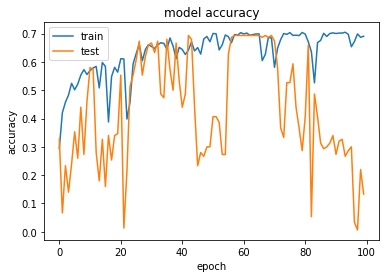

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

plt.show() 

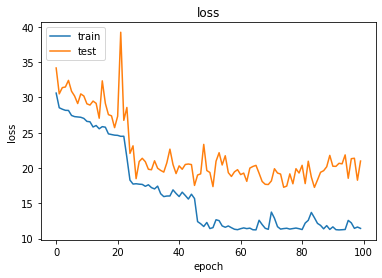

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

plt.show() 